<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/Week2Part1_data_620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diameter of the subgraph: 4
Average clustering coefficient of the subgraph: 0.5130839320504162
Degree centrality for the first 5 nodes:
Node 0: 0.12121212121212122
Node 1: 0.10101010101010102
Node 2: 0.19191919191919193
Node 3: 0.15151515151515152
Node 4: 0.18181818181818182


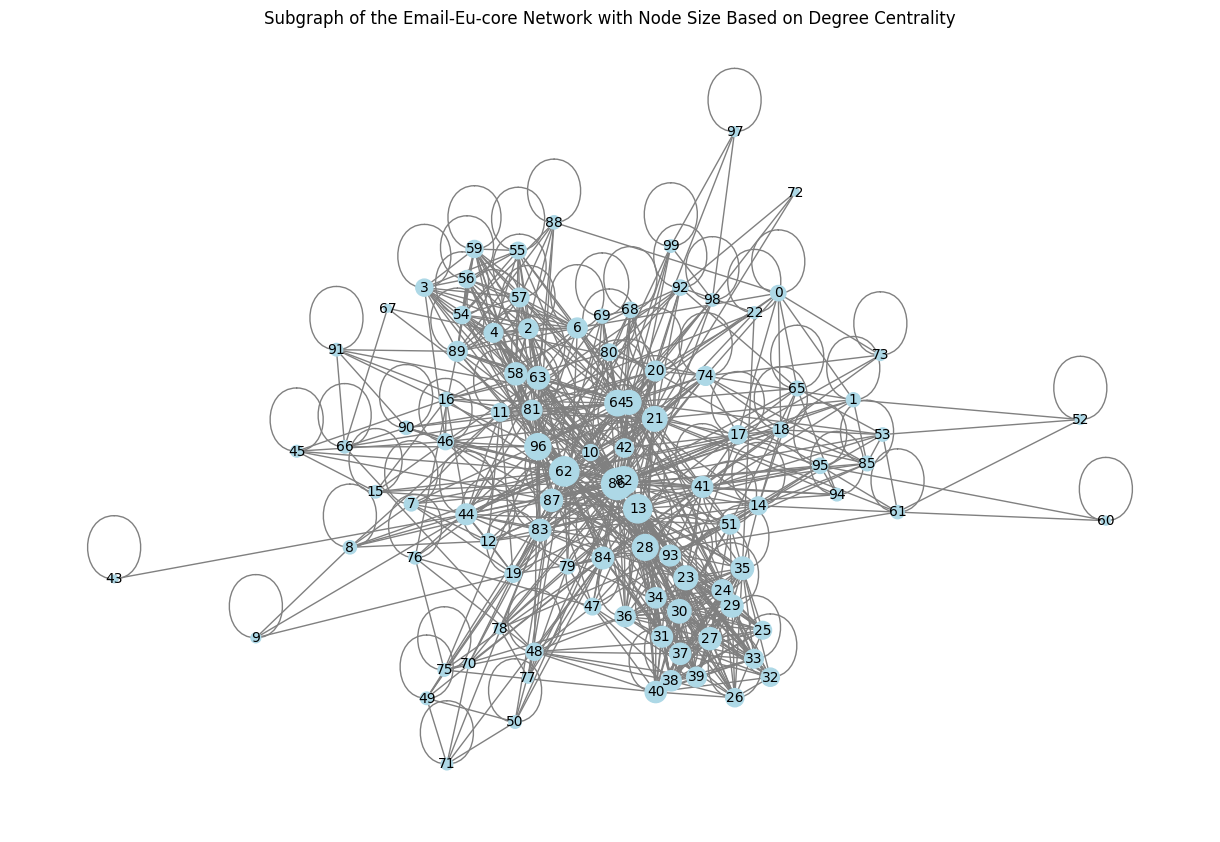

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
import io
import gzip # Import the gzip module to handle compressed files

# Download the dataset

url = 'https://snap.stanford.edu/data/email-Eu-core.txt.gz'
response = requests.get(url)
Email_Eu_core_network = url

# Decompress the gzip file
with gzip.GzipFile(fileobj=io.BytesIO(response.content)) as f:
    # Load the dataset into a NetworkX graph
    G = nx.read_edgelist(f, nodetype=int, create_using=nx.Graph())

# Create a subgraph with the first 100 nodes
sub_nodes = list(G.nodes)[:100]
G_sub = G.subgraph(sub_nodes)

# Basic analysis
diameter = nx.diameter(G_sub)
avg_clustering = nx.average_clustering(G_sub)
degree_centrality = nx.degree_centrality(G_sub)

# Print analysis results
print(f"Diameter of the subgraph: {diameter}")
print(f"Average clustering coefficient of the subgraph: {avg_clustering}")

# Print degree centrality for the first 5 nodes as an example
print("Degree centrality for the first 5 nodes:")
for node, centrality in list(degree_centrality.items())[:5]:
    print(f"Node {node}: {centrality}")

# Visualize the graph with node size based on degree centrality
pos = nx.spring_layout(G_sub)
node_size = [v * 1000 for v in degree_centrality.values()]  # Scale node size by centrality

plt.figure(figsize=(12, 8))
nx.draw(G_sub, pos, with_labels=True, node_color='lightblue', node_size=node_size, edge_color='gray', font_size=10)
plt.title('Subgraph of the Email-Eu-core Network with Node Size Based on Degree Centrality')
plt.show()